# **Finding Duplicates Lab**


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset.


## Objectives


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


Install the needed library


In [ ]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [ ]:
import pandas as pd


Import matplotlib


In [ ]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [ ]:
# Load the dataset directly from the URL
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [ ]:
## Write your code here

#1
duplicated_rows=df.duplicated().sum()
print('duplicated rows are -------------------------->',duplicated_rows)

#2
duplicate_rows = df[df.duplicated(keep=False)]
print("First few duplicate rows:")
print(duplicate_rows.head())

duplicated rows are --------------------------> 20
First few duplicate rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3            

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [ ]:
## Write your code here

#1
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates = df[df.duplicated(subset=subset_cols, keep=False)]
dups_col_wise=[]
for col in subset_cols:

    dup_num=len(df[df.duplicated(subset=col,keep=False)])
    dups_col_wise.append(dup_num)

print(dups_col_wise)

[65457, 65432, 65457]


In [ ]:
#2
grouped = duplicates.groupby(subset_cols)

identical_counts = {}

for col in df.columns:    #-or- columns_to_check = [col for col in df.columns if col not in subset_cols]
    if col not in subset_cols:      #for col in columns_to_check:

        is_identical = grouped[col].nunique(dropna=False) == 1
        identical_counts[col] = is_identical.sum()

sorted_identical = sorted(identical_counts.items(), key=lambda x: x[1], reverse=True)

print("Columns with the most consistent values across duplicate groups:\n")
for col, count in sorted_identical:
    percentage = (count / len(grouped)) * 100
    print(f"{col}: Identical in {count}/{len(grouped)} and {percentage:.2f}% duplicate groups\n")


Analysis of identical values within these duplicate rows:
Columns with the most consistent values across duplicate groups:

Check: Identical in 319/394 and 80.96% duplicate groups

AINextMuch less integrated: Identical in 213/394 and 54.06% duplicate groups

ConvertedCompYearly: Identical in 165/394 and 41.88% duplicate groups

BuildvsBuy: Identical in 161/394 and 40.86% duplicate groups

AINextLess integrated: Identical in 161/394 and 40.86% duplicate groups

PurchaseInfluence: Identical in 156/394 and 39.59% duplicate groups

CompTotal: Identical in 152/394 and 38.58% duplicate groups

OrgSize: Identical in 151/394 and 38.32% duplicate groups

Currency: Identical in 146/394 and 37.06% duplicate groups

YearsCodePro: Identical in 144/394 and 36.55% duplicate groups

BuyNewTool: Identical in 143/394 and 36.29% duplicate groups

TechEndorse: Identical in 142/394 and 36.04% duplicate groups

Frequency_3: Identical in 135/394 and 34.26% duplicate groups

TBranch: Identical in 134/394 and

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


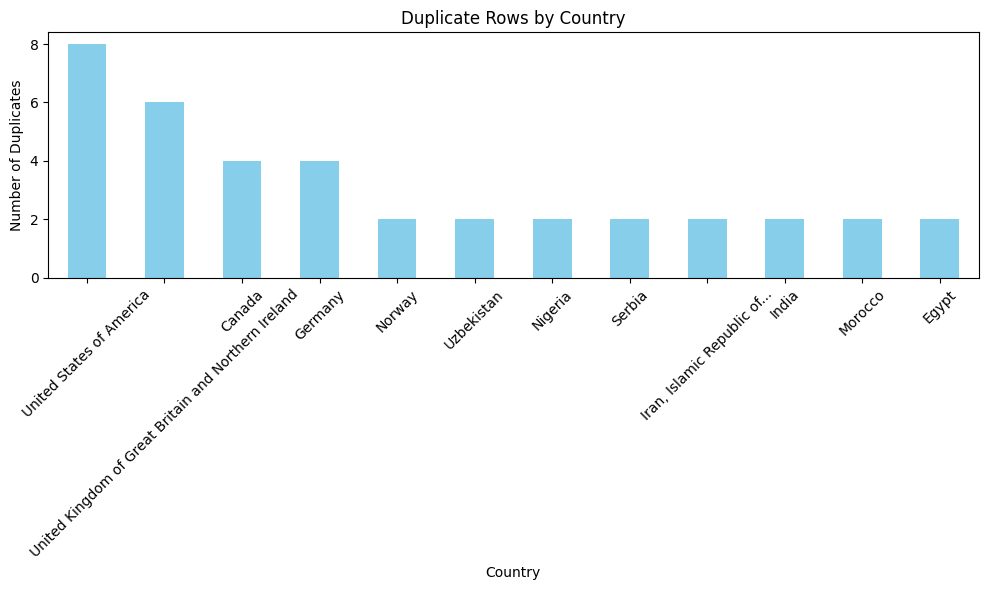

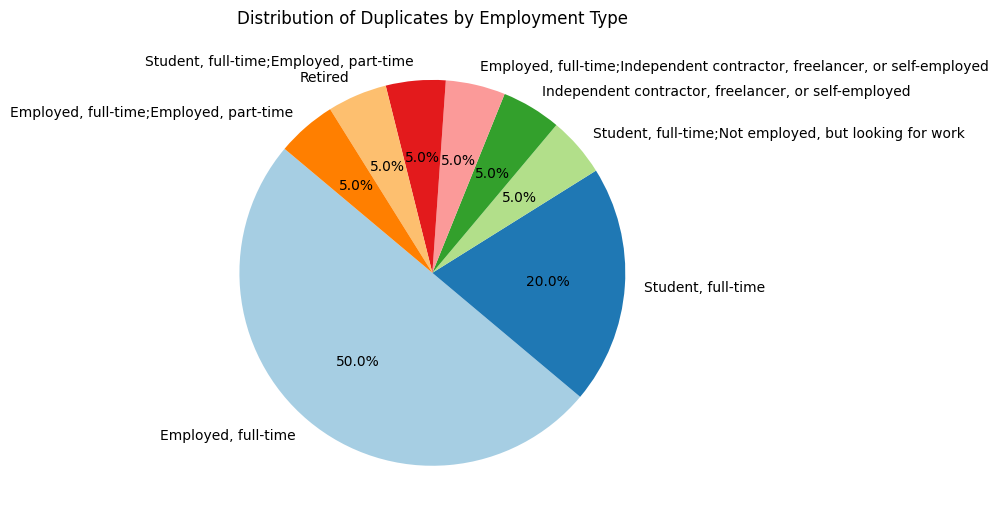

In [ ]:
## Write your code here
duplicates = df[df.duplicated(keep=False)]
#Bar Chart
country_counts = duplicates['Country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Duplicate Rows by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Pie Chart
employment_counts = duplicates['Employment'].value_counts()

plt.figure(figsize=(9, 9))
employment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Duplicates by Employment Type')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [ ]:

unique_cols = ['MainBranch', 'Employment', 'RemoteWork']

df_deduplicated = df.drop_duplicates(subset=unique_cols, keep='first')

rows_removed = df.shape[0] - df_deduplicated.shape[0]
print(f"Removed {rows_removed} duplicate rows based on columns: {unique_cols}")


Removed 64896 duplicate rows based on columns: ['MainBranch', 'Employment', 'RemoteWork']
